# 🧪 Remote Focusing Simulation with LightPipes

This notebook simulates a simple remote focusing system using the LightPipes package.
We will visualize how wavefronts evolve in a system with:
- A beam expansion telescope (e.g. 75 mm → 150 mm)
- A focusing lens and a movable mirror (to simulate z-displacement)
- A return pass through the telescope
- The resulting wavefront entering the scan system

We will observe how mirror displacement introduces wavefront curvature, and how mismatched optics affect focus.

In [ ]:
# 📦 Import LightPipes and setup basic parameters
from LightPipes import *
import matplotlib.pyplot as plt
import numpy as np

# Constants
wavelength = 920*nm  # wavelength in meters
size = 20*mm           # simulation grid size [m]
N = 512             # grid resolution

# Lens focal lengths
f1 = 75*mm
f2 = 150*mm
f_focus = 30*mm      # lens focusing onto the mirror

# Mirror displacement (user controlled)
z_mirror = 10*mm  # [m], try values like 0, 25e-6, 50e-6

# Create initial Gaussian beam
F = Begin(size,wavelength, N)
F = GaussBeam(F, 4*mm)

In [1]:
# 🚀 Forward pass through beam expander (75 → 150 mm)
F = Lens(F, f1)
F = Propagate(F, f1 + f2)
F = Lens(F, f2)

NameError: name 'Lens' is not defined

In [ ]:
# 🔁 Focus onto mirror via 30 mm lens
F = Propagate(F, 50*mm)       # propagate to focus lens
F = Lens(F, f_focus)
F = Propagate(F, f_focus + z_mirror)  # to displaced mirror

# Reflect from mirror and return
F = Propagate(F, f_focus + z_mirror)
F = Lens(F, f_focus)
F = Propagate(F, 50e-3)

78.00046434536821
using GForvard, pure Gauss field
using GaussLens
97.50053767165501
using GForvard, pure Gauss field
24.008366117233525
using GForvard, pure Gauss field
using GaussLens
110.24548012810037
using GForvard, pure Gauss field


using GaussLens
29.960303029055805
using GForvard, pure Gauss field
using GaussLens


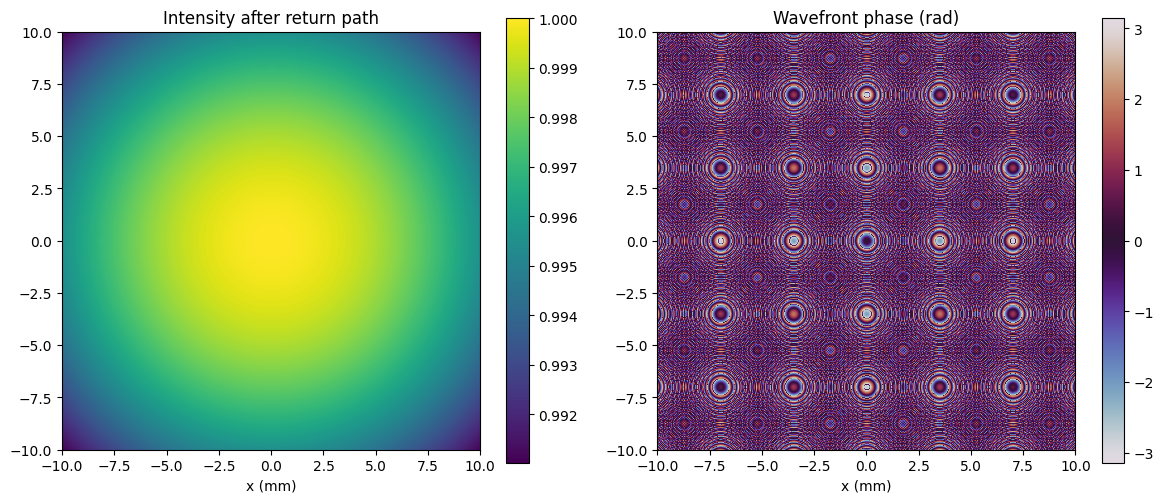

In [ ]:
# ⬅️ Backward pass through telescope (150 → 75 mm)
F = Lens(F, f2)
F = Propagate(F, f1 + f2)
F = Lens(F, f1)

# View the final wavefront
I = Intensity(1, F)
phase = Phase(F)

# Plot intensity and phase
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(I, extent=[-size/2*1e3, size/2*1e3, -size/2*1e3, size/2*1e3])
plt.title("Intensity after return path")
plt.xlabel("x (mm)")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(phase, extent=[-size/2*1e3, size/2*1e3, -size/2*1e3, size/2*1e3], cmap='twilight')
plt.title("Wavefront phase (rad)")
plt.xlabel("x (mm)")
plt.colorbar()
plt.tight_layout()
plt.show()